# Correlation vs mode number
This notebook loads data from the unbalanced array detection scripts and computes correlation matrix between all modes

In [1]:
%matplotlib inline
import sys
sys.path.append('/home/photon/code/PylonCCD')
import numpy as np
import Qfunction as Qfunc
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import listdir, path, chdir

In [2]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [39]:
#Use this to pull from a different day:
data_folder = "/home/photon/data/06-10-2021"
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)

In [40]:
allFiles = listdir(data_folder)
allFiles.sort()
set(zip(allFiles,range(len(allFiles))))

{('10-31-25_raw.npz', 0),
 ('10-43-21_raw.npz', 1),
 ('10-52-57_raw.npz', 2),
 ('11-11-07_raw.npz', 3),
 ('11-16-46_raw.npz', 4),
 ('11-28-59_raw.npz', 5),
 ('17-20-32_raw.npz', 6)}

In [52]:
#Import last file in folder (by default)
data_npz = np.load(allFiles[4])
VacCorrected = data_npz['VacCorrected']
ncount = data_npz['ncount']

scaled_vc = np.sqrt(2.0/ncount)*VacCorrected

In [53]:
scaled_vc.shape

(1300, 59, 20)

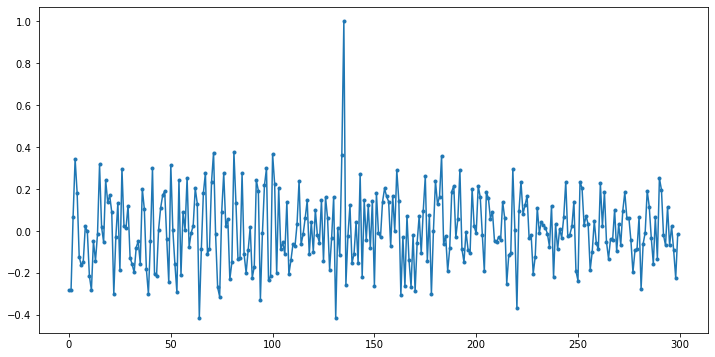

In [54]:
# Demonstrate what we are looking at:
# TODO: sort out the oscillation effect (why, etc)
# works well with data set 10 from 06-09-2021
example = []
for i in range(300,600):
    m1 = np.real(scaled_vc[i].flatten('F'))
    m2 = np.real(scaled_vc[435].flatten('F'))
    Pearson, p = sp.pearsonr(m1,m2)
    example.append(Pearson)
    
plt.plot(example,".-")

In [55]:
mode_of_interest = 440
mode_offset = 300
range_to_analyze = 300
modes = range(range_to_analyze)

output = scaled_vc[mode_of_interest,:,:].flatten('F')  # Choose the mode to analyze
x = np.real(output)
y = np.imag(output)

Pearson = np.zeros(range_to_analyze, dtype = np.complex)
theta = []
photonNumber = []

for i in modes:
        m = i+mode_offset
        RealPearson, p = sp.pearsonr(np.real(scaled_vc[m].flatten('F')), x)
        ImagPearson, p = sp.pearsonr(np.imag(scaled_vc[m].flatten('F')), y)
        Pearson[i] = RealPearson + ImagPearson*1j
        theta.append(m * (780e-9*1000)/(1300*20e-6)) #AMCD check this for the right scaling, was 600
        photonNumber.append(0.5*(np.average(np.abs(scaled_vc[m])))**2)
    

In [56]:
# Calculate the complex correlation matrix between each mode.
modes = range(0,range_to_analyze)

PearsonMatrix = np.zeros((range_to_analyze,range_to_analyze),dtype=np.complex)

for i in modes:
    output = scaled_vc[i+mode_offset,:,:].flatten('F')  # Choose the mode to analyze
    x = np.real(output)
    y = np.imag(output)
    for k in modes:
        PearsonReal, p = sp.pearsonr(np.real(scaled_vc[k+mode_offset].flatten('F')), x)
        PearsonImag, p = sp.pearsonr(np.imag(scaled_vc[k+mode_offset].flatten('F')), y)
        PearsonMatrix[i,k] = PearsonReal + PearsonImag*1j
        if (i==k):
            PearsonMatrix[i,k] = 0 # AMCD null the auto-correlation

In [57]:
# Calculate the correlation matrix between magnitude of each mode.
modes = range(0,range_to_analyze)

PearsonMagnitude = np.zeros((range_to_analyze,range_to_analyze))

for i in modes:
    output = scaled_vc[i+mode_offset,:,:].flatten('F')  # Choose the mode to analyze
    x = np.abs(output)
    for k in modes:
        Pearson, p = sp.pearsonr(np.abs(scaled_vc[k+mode_offset].flatten('F')), x)
        if (i==k):
            PearsonMagnitude[i,k] = 0
        else:
            PearsonMagnitude[i,k] = Pearson

In [58]:
# Calculate the correlation matrix between phase of each mode.
modes = range(0,range_to_analyze)

PearsonPhase = np.zeros((range_to_analyze,range_to_analyze))

for i in modes:
    output = scaled_vc[i+mode_offset,:,:].flatten('F')  # Choose the mode to analyze
    x = np.angle(output)
    for k in modes:
        Pearson, p = sp.pearsonr(np.angle(scaled_vc[k+mode_offset].flatten('F')), x)
        if (i==k):
            PearsonPhase[i,k] = 0 #AMCD Null the 1.0 auto-correlation
        else:
            PearsonPhase[i,k] = Pearson

Text(0.5, 1.0, 'Phase')

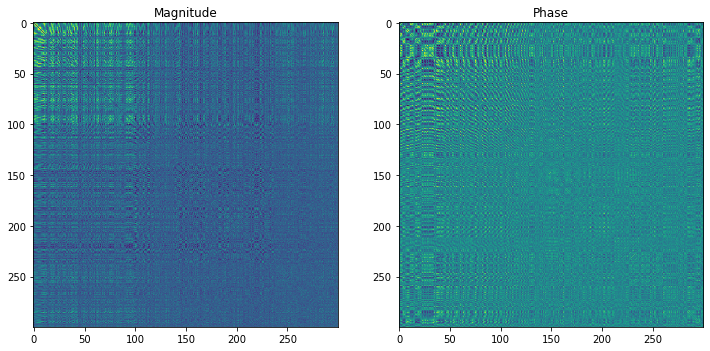

In [62]:
plt.subplot(121)
plt.imshow(PearsonMagnitude,interpolation='none')
plt.title("Magnitude")
plt.subplot(122)
plt.imshow(PearsonPhase,interpolation='none')
plt.title("Phase")

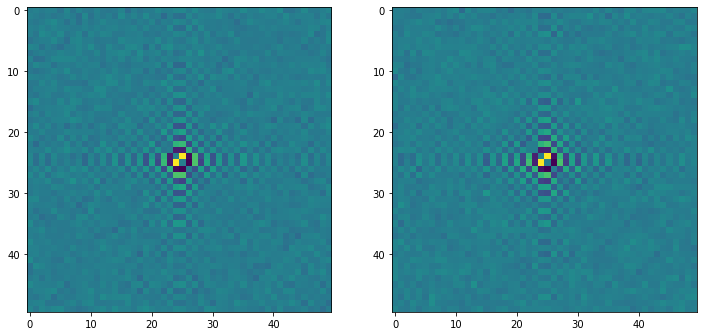

In [36]:
plt.subplot(121)
plt.imshow(np.real(PearsonMatrix),interpolation='none')
plt.subplot(122)
plt.imshow(np.imag(PearsonMatrix),interpolation='none')

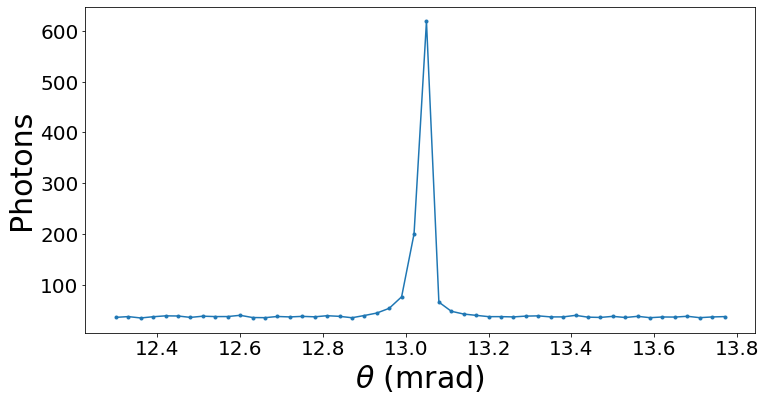

In [31]:
plt.plot(theta, photonNumber ,".-")
plt.xlabel("$\\theta$ (mrad)",fontsize=30)
plt.ylabel("Photons",fontsize=30)
#plt.xlim((0,30))
#plt.ylim((-1,50))
plt.tick_params(labelsize=20)

Text(0, 0.5, 'Pearson Product-Moment Correlation Coefficient')

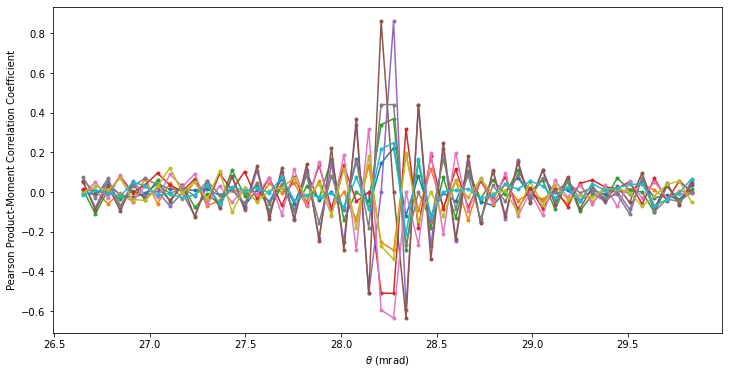

In [185]:
plt.plot(theta,PearsonMatrix[:,20:30].real,".-")
#plot(theta,Pearson_imagF,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")

Text(0, 0.5, 'Pearson Product-Moment Correlation Coefficient')

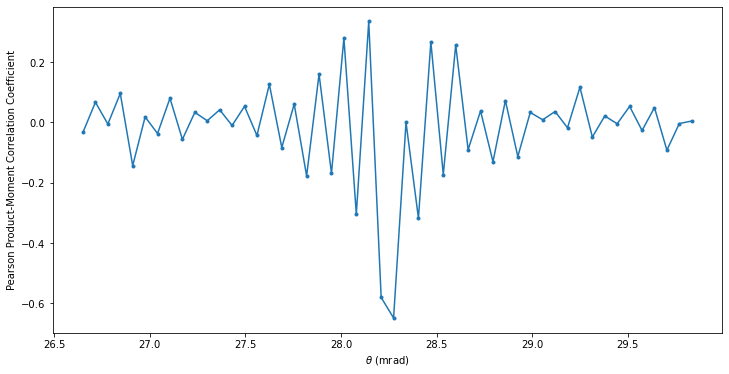

In [184]:
plt.plot(theta,PearsonMatrix[:,26].imag,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")

Text(0, 0.5, 'Pearson Product-Moment Correlation Coefficient')

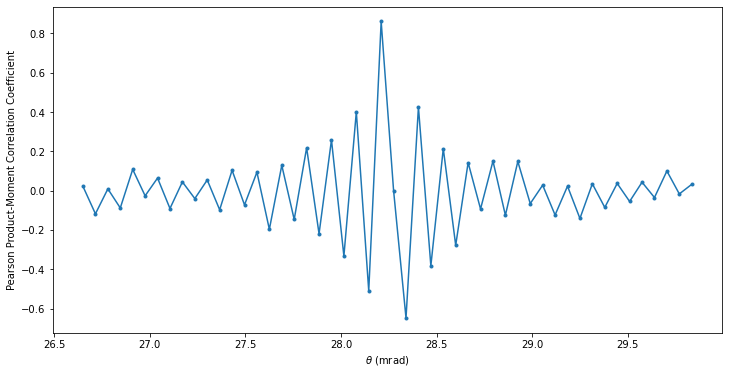

In [183]:
plt.plot(theta,PearsonMatrix[:,25].imag,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")